In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
source=pd.read_csv('filtered_notext_review_addscore.csv')

In [7]:
df=pd.DataFrame(columns=("review_rating","c1"))

In [8]:
df.head(10)

,rating,score


In [9]:
df.loc[0]=[source.rating[0],source.score[0]]

In [10]:
for i in range(0,len(source),1):
    df.loc[i]=[source.rating[i],source.score[i]]

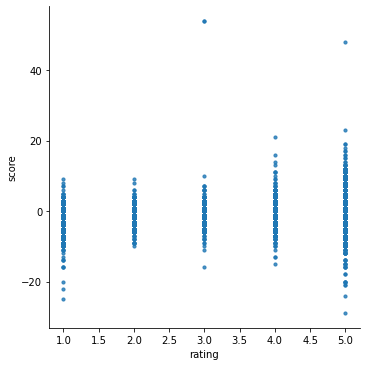

In [22]:
#visualize data point
sns.lmplot('rating','score', data=source, fit_reg = False, scatter_kws={"s":10}, size=5)
#title
#plt.title('kmean plot')

In [12]:
data_points = df.values

In [13]:
kmeans = KMeans(n_clusters=3).fit(data_points)

In [14]:
kmeans.labels_

array([0, 0, 0, ..., 2, 1, 1])

In [15]:
df['cluster_id']=kmeans.labels_

In [16]:
df

,rating,score,cluster_id
0,1,-2,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
151316,5,0,1
151317,5,0,1
151318,5,-2,2
151319,5,0,1


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'kmean plt ver2')

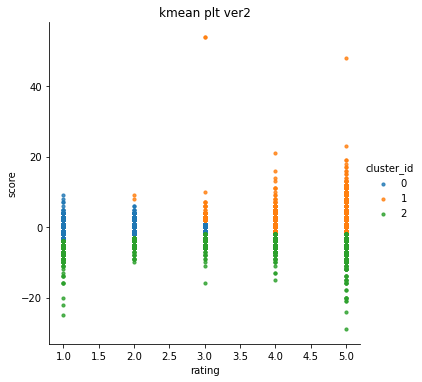

In [26]:
sns.lmplot('rating','score', data=df, fit_reg=False, scatter_kws={'s':10}, hue="cluster_id", size=5)
plt.title('kmean plt ver2')

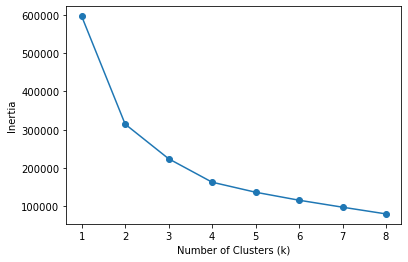

In [27]:
num_clusters = list(range(1, 9))	# K는 1 ~ 8사이의 정수입니다
inertias = []
# 각 K별로 모델을 생성하여 inertia를 측정합니다
for i in num_clusters:
    model = KMeans(n_clusters=i)
    model.fit(df)
    inertias.append(model.inertia_)
# K에 따른 inertia의 변화를 시각화합니다
plt.plot(num_clusters, inertias, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()